In [271]:
#Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

In [272]:
#Load the Dataset
data = pd.read_csv("2020_al_data_kaggle_upload_new_old_syllabi.csv")

In [273]:
#Check the shape of dataset
data.shape

(337553, 19)

In [274]:
#Check the Empty Values
data.isnull()

,index,stream,Zscore,district_rank,island_rank,al_year,sub1,sub1_r,sub2,sub2_r,sub3,sub3_r,cgt_r,ge_r,syllabus,birth_day,birth_month,birth_year,gender
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
337548,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
337549,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
337550,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
337551,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [275]:
#check the empty data
data.isnull().sum()

index               0
stream              0
Zscore              0
district_rank       0
island_rank         0
al_year             0
sub1                0
sub1_r              0
sub2                0
sub2_r              0
sub3                0
sub3_r              0
cgt_r               0
ge_r                0
syllabus            0
birth_day           0
birth_month         0
birth_year          0
gender           1484
dtype: int64

In [276]:
#Load Dataset data
data.head()

,index,stream,Zscore,district_rank,island_rank,al_year,sub1,sub1_r,sub2,sub2_r,sub3,sub3_r,cgt_r,ge_r,syllabus,birth_day,birth_month,birth_year,gender
0,0,ARTS,-.3550,4336 (NEW),64994 (NEW),2020,POLITICAL SCIENCE,S,DANCING(BHARATHA),C,TAMIL,S,056,S,new,31,May,2001,female
1,1,ARTS,-.2648,4154 (NEW),62338 (NEW),2020,POLITICAL SCIENCE,S,CARNATIC MUSIC,C,TAMIL,C,032,C,new,13,January,2002,female
2,2,COMMERCE,-.4760,6910 (NEW),37307 (NEW),2020,ECONOMICS,S,BUSINESS STUDIES,S,ACCOUNTING,S,050,S,new,16,August,2001,female
3,3,COMMERCE,-.1012,5678 (NEW),30449 (NEW),2020,ECONOMICS,C,BUSINESS STUDIES,C,ACCOUNTING,S,034,S,new,16,August,2001,female
4,4,COMMERCE,.6014,3269 (NEW),17010 (NEW),2020,ECONOMICS,C,BUSINESS STUDIES,C,ACCOUNTING,B,036,S,new,7,August,2000,female


## Data Preprocessing


In [277]:
#Handle the missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 337553 entries, 0 to 337552
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   index          337553 non-null  int64 
 1   stream         337553 non-null  object
 2   Zscore         337553 non-null  object
 3   district_rank  337553 non-null  object
 4   island_rank    337553 non-null  object
 5   al_year        337553 non-null  int64 
 6   sub1           337553 non-null  object
 7   sub1_r         337553 non-null  object
 8   sub2           337553 non-null  object
 9   sub2_r         337553 non-null  object
 10  sub3           337553 non-null  object
 11  sub3_r         337553 non-null  object
 12  cgt_r          337553 non-null  object
 13  ge_r           337553 non-null  object
 14  syllabus       337553 non-null  object
 15  birth_day      337553 non-null  object
 16  birth_month    337553 non-null  object
 17  birth_year     337553 non-null  object
 18  gend

In [278]:
#Replace the Unknown data
data['gender'].fillna('Unknown',inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_17424\1045613016.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['gender'].fillna('Unknown',inplace=True)


In [279]:
#Recheck the status of dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 337553 entries, 0 to 337552
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   index          337553 non-null  int64 
 1   stream         337553 non-null  object
 2   Zscore         337553 non-null  object
 3   district_rank  337553 non-null  object
 4   island_rank    337553 non-null  object
 5   al_year        337553 non-null  int64 
 6   sub1           337553 non-null  object
 7   sub1_r         337553 non-null  object
 8   sub2           337553 non-null  object
 9   sub2_r         337553 non-null  object
 10  sub3           337553 non-null  object
 11  sub3_r         337553 non-null  object
 12  cgt_r          337553 non-null  object
 13  ge_r           337553 non-null  object
 14  syllabus       337553 non-null  object
 15  birth_day      337553 non-null  object
 16  birth_month    337553 non-null  object
 17  birth_year     337553 non-null  object
 18  gend

In [280]:
#Check the preprocessed column available data
data['gender'].unique()

array(['female', 'male', 'Unknown', 'Major error'], dtype=object)

In [281]:
#Remove unused data
data = data.drop(columns=['index','al_year','birth_day','birth_month','birth_year','district_rank','island_rank','cgt_r','ge_r'])

In [282]:
#Load new Data
data.head()

,stream,Zscore,sub1,sub1_r,sub2,sub2_r,sub3,sub3_r,syllabus,gender
0,ARTS,-.3550,POLITICAL SCIENCE,S,DANCING(BHARATHA),C,TAMIL,S,new,female
1,ARTS,-.2648,POLITICAL SCIENCE,S,CARNATIC MUSIC,C,TAMIL,C,new,female
2,COMMERCE,-.4760,ECONOMICS,S,BUSINESS STUDIES,S,ACCOUNTING,S,new,female
3,COMMERCE,-.1012,ECONOMICS,C,BUSINESS STUDIES,C,ACCOUNTING,S,new,female
4,COMMERCE,.6014,ECONOMICS,C,BUSINESS STUDIES,C,ACCOUNTING,B,new,female


In [283]:
#Convert String Data to Numerical Data
colums = ['stream','sub1','sub1_r','sub2','sub2_r','sub3','sub3_r','syllabus','gender']
label_encoder = {col : LabelEncoder() for col in colums}
for col in colums:
    data[col] = label_encoder[col].fit_transform(data[col])

In [284]:
#Load the new converted dataset
data.head()

,stream,Zscore,sub1,sub1_r,sub2,sub2_r,sub3,sub3_r,syllabus,gender
0,1,-.3550,47,5,20,3,58,6,0,2
1,1,-.2648,47,5,12,3,58,4,0,2
2,4,-.4760,21,5,11,5,0,6,0,2
3,4,-.1012,21,3,11,3,0,6,0,2
4,4,.6014,21,3,11,3,0,3,0,2


In [285]:
#Check the dataset new situation
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 337553 entries, 0 to 337552
Data columns (total 10 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   stream    337553 non-null  int64 
 1   Zscore    337553 non-null  object
 2   sub1      337553 non-null  int64 
 3   sub1_r    337553 non-null  int64 
 4   sub2      337553 non-null  int64 
 5   sub2_r    337553 non-null  int64 
 6   sub3      337553 non-null  int64 
 7   sub3_r    337553 non-null  int64 
 8   syllabus  337553 non-null  int64 
 9   gender    337553 non-null  int64 
dtypes: int64(9), object(1)
memory usage: 25.8+ MB


In [286]:
#Change the column type
data['Zscore'] = pd.to_numeric(data['Zscore'],errors='coerce')

In [287]:
#Check the dataset new situation
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 337553 entries, 0 to 337552
Data columns (total 10 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   stream    337553 non-null  int64  
 1   Zscore    232304 non-null  float64
 2   sub1      337553 non-null  int64  
 3   sub1_r    337553 non-null  int64  
 4   sub2      337553 non-null  int64  
 5   sub2_r    337553 non-null  int64  
 6   sub3      337553 non-null  int64  
 7   sub3_r    337553 non-null  int64  
 8   syllabus  337553 non-null  int64  
 9   gender    337553 non-null  int64  
dtypes: float64(1), int64(9)
memory usage: 25.8 MB


## Analysed the Data in Dataset

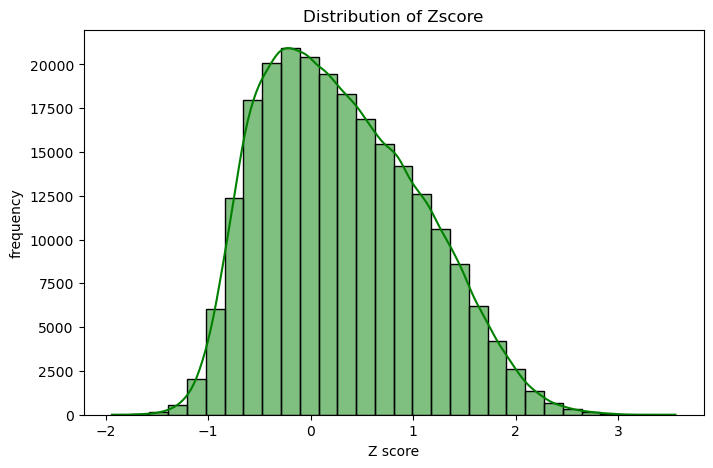

In [288]:
#Analysed the Data in Dataset
plt.figure(figsize=(8,5))
sns.histplot(data['Zscore'],kde=True,bins=30,color='green')
plt.title('Distribution of Zscore')
plt.xlabel('Z score')
plt.ylabel('frequency')
plt.show()

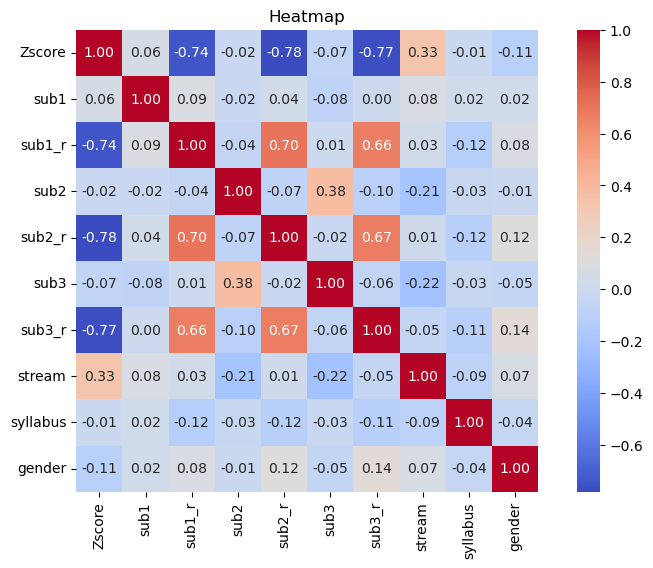

In [289]:
#Implement a heapmap
plt.figure(figsize=(10,6))
matdata = data[['Zscore','sub1','sub1_r','sub2','sub2_r','sub3','sub3_r','stream','syllabus','gender']]
sns.heatmap(matdata.corr(),annot=True,cmap='coolwarm',fmt='.2f',square=True)
plt.title("Heatmap")
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_17424\2811784613.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='stream',data=data,palette='viridis',order=data['stream'].value_counts().index)


([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '4'),
  Text(3, 0, '2'),
  Text(4, 0, '7'),
  Text(5, 0, '5'),
  Text(6, 0, '3'),
  Text(7, 0, '6')])

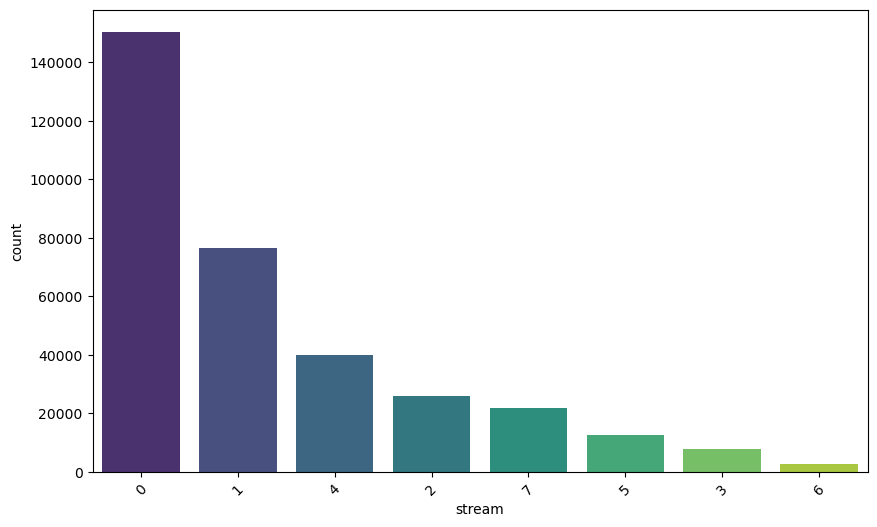

In [290]:
#Create a countplot
plt.figure(figsize=(10,6))
sns.countplot(x='stream',data=data,palette='viridis',order=data['stream'].value_counts().index)
plt.xticks(rotation=45)

In [291]:
#Reexecute the Null Values
data['Zscore'].fillna(data['Zscore'].mean(),inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_17424\423074543.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Zscore'].fillna(data['Zscore'].mean(),inplace=True)


In [292]:
#Categories the data into the axis
x = data.drop(columns=['Zscore'])
y = data['Zscore']

In [293]:
#Check x Axix shape
x.shape

(337553, 9)

In [294]:
#Check y Axix shape
y.shape

(337553,)

In [295]:
#Categories data to tain the model
x_train,x_test,y_train,y_test =train_test_split(x,y,test_size=0.3,random_state=42)

In [296]:
#Check x train shape
x_train.shape

(236287, 9)

In [297]:
#Check x test shape
x_test.shape

(101266, 9)

In [298]:
#Check y train shape
y_train.shape

(236287,)

In [299]:
#Check y test shape
y_test.shape

(101266,)

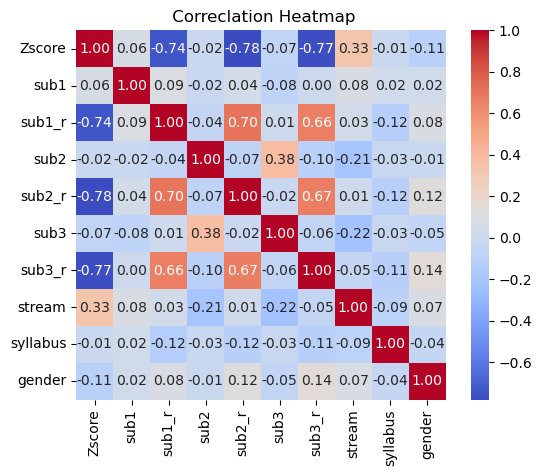

In [300]:
#Re Implement a heatmap
sns.heatmap(matdata.corr(),annot=True,cmap='coolwarm',fmt='.2f',square=True)
plt.title(" Correclation Heatmap")
plt.show()

In [301]:
#Train the model
model = LinearRegression()
model.fit(x_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [302]:
#Get the prediction
y_predict = model.predict(x_test)
y_predict

array([-0.12669943,  0.8794374 , -0.22595808, ...,  1.40217164,
        0.27357813, -0.10026123])

In [303]:
#Calculate the Score of the model
r2_score(y_test,y_predict)

0.6064914926424201

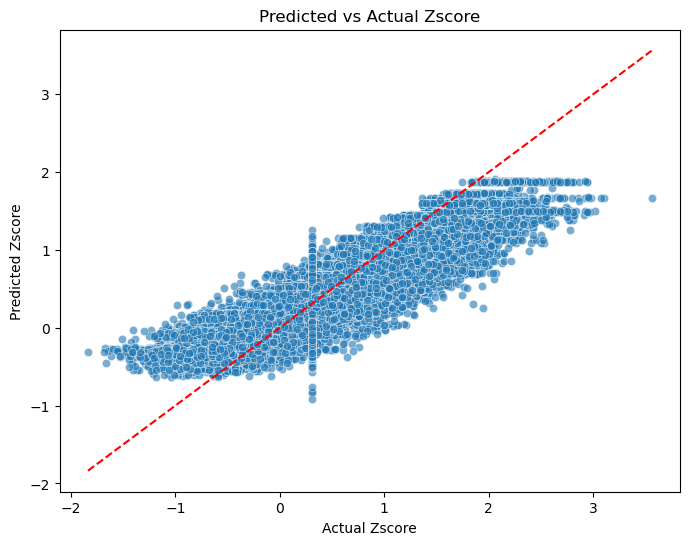

In [304]:
# Visualize predictions vs actual
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_predict, alpha=0.6)

# Plotting a diagonal reference line
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')

plt.title('Predicted vs Actual Zscore')
plt.xlabel('Actual Zscore')
plt.ylabel('Predicted Zscore')
plt.show()

In [305]:
#Reprocess the data to accurate the model
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [306]:
#Re scale the data
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [307]:
#Re Train the model
model2 = LinearRegression()
model.fit(x_train_scaled, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [308]:
#Get the prediction Newly Model
y_predict2 = model.predict(x_test_scaled)
y_predict2

array([-0.12669943,  0.8794374 , -0.22595808, ...,  1.40217164,
        0.27357813, -0.10026123])

In [309]:
#Calculate the Score of the model2
r2_score(y_test,y_predict2)

0.60649149264242

## 0.6064914926424201 - Previous Model Accuracy
## 0.60649149264242   - New Model Accuracy

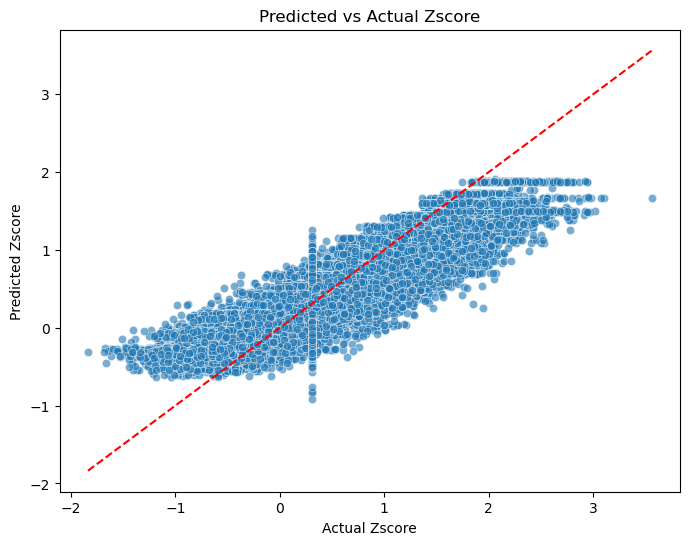

In [310]:
# Visualize predictions vs actual
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_predict2, alpha=0.6)

# Plotting a diagonal reference line
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')

plt.title('Predicted vs Actual Zscore')
plt.xlabel('Actual Zscore')
plt.ylabel('Predicted Zscore')
plt.show()

In [311]:
#Reprocess the data to accurate the model
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [312]:
#Re scale the data
x_train_scaled1 = scaler.fit_transform(x_train_scaled)
x_test_scaled1 = scaler.transform(x_test_scaled)

In [313]:
#Re Train the model
model3 = LinearRegression()
model.fit(x_train_scaled1, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [314]:
#Get the prediction Newly Model
y_predict3 = model.predict(x_test_scaled1)
y_predict3

array([-0.12669943,  0.8794374 , -0.22595808, ...,  1.40217164,
        0.27357813, -0.10026123])

In [315]:
#Calculate the Score of the model2
r2_score(y_test,y_predict3)

0.60649149264242

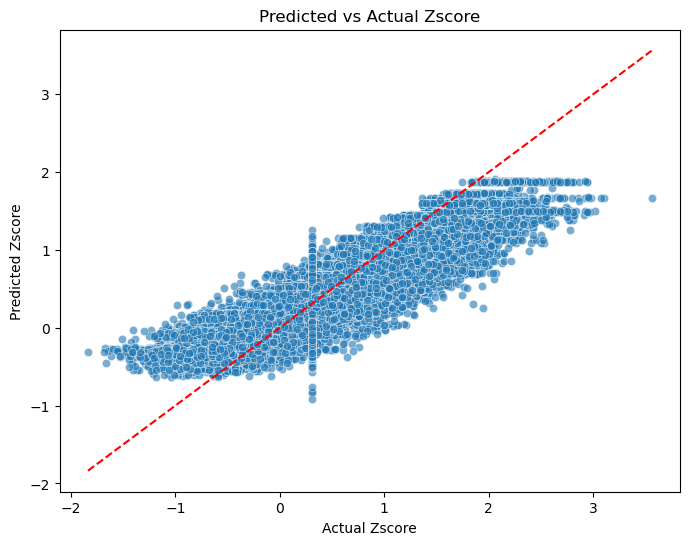

In [316]:
# Visualize predictions vs actual
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_predict3, alpha=0.6)

# Plotting a diagonal reference line
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')

plt.title('Predicted vs Actual Zscore')
plt.xlabel('Actual Zscore')
plt.ylabel('Predicted Zscore')
plt.show()

In [320]:
#Save the model
import pickle
with open("model.pickle","wb") as file:
    pickle.dump(model,file)